=================================================================================================================================================

Dataset: Moodify Dataset (278k Emotion Labelled Spotify Songs)

Dataset Author: Abdullah Orzan

Repository: Kaggle

Dataset Link: https://www.kaggle.com/datasets/abdullahorzan/moodify-dataset

=================================================================================================================================================

||  IMPORT NECESSARY LIBRARIES AND PACKAGES  ||

In [1]:
import numpy as np
import pandas as pd

#For plots
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#For Machine Learning and Metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 

||  IMPORT DATASET  ||

In [2]:
df = pd.read_csv('C:/Users/cjjth/Desktop/Git Files/Py pgms/labelled_uri.csv')
df1 = pd.read_csv('C:/Users/cjjth/Desktop/Git Files/Py pgms/song_labelled.csv')

In [3]:
df

,Unnamed: 0,Unnamed: 0.1,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,0,0,195000.0,0.611,0.614,-8.815,0.0672,0.01690,0.000794,0.7530,0.520,128.050,3.446154e-07,2,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,1,1,194641.0,0.638,0.781,-6.848,0.0285,0.01180,0.009530,0.3490,0.250,122.985,1.464234e-07,1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO
2,2,2,217573.0,0.560,0.810,-8.029,0.0872,0.00710,0.000008,0.2410,0.247,170.044,4.007850e-07,1,spotify:track:2CY92qejUrhyPUASawNVRr
3,3,3,443478.0,0.525,0.699,-4.571,0.0353,0.01780,0.000088,0.0888,0.199,92.011,7.959809e-08,0,spotify:track:11BPfwVbB7vok7KfjBeW4k
4,4,4,225862.0,0.367,0.771,-5.863,0.1060,0.36500,0.000001,0.0965,0.163,115.917,4.693131e-07,1,spotify:track:3yUJKPsjvThlcQWTS9ttYx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277933,277933,277933,276360.0,0.777,0.725,-9.012,0.0470,0.12600,0.010800,0.0917,0.851,128.349,1.700680e-07,1,spotify:track:6wLr2oR8eqUG5Beleh2Crm
277934,277934,277934,284773.0,0.543,0.482,-12.789,0.1940,0.08530,0.000092,0.1110,0.415,193.513,6.812444e-07,1,spotify:track:5mYtpXrZZ1bbGJYDGC8I0Y
277935,277935,277935,241307.0,0.527,0.942,-5.640,0.0366,0.01150,0.000000,0.1880,0.495,148.723,1.516740e-07,2,spotify:track:7FwBtcecmlpc1sLySPXeGE
277936,277936,277936,234333.0,0.768,0.829,-5.109,0.0313,0.09640,0.000029,0.0970,0.962,118.773,1.335706e-07,1,spotify:track:2olVm1lHicpveMAo4AUDRB


In [4]:
df1

,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,0,195000.0,0.611,0.614,-8.815,0.0672,0.01690,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,1,194641.0,0.638,0.781,-6.848,0.0285,0.01180,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,2,217573.0,0.560,0.810,-8.029,0.0872,0.00710,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,3,443478.0,0.525,0.699,-4.571,0.0353,0.01780,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,4,225862.0,0.367,0.771,-5.863,0.1060,0.36500,0.000001,0.0965,0.163,115.917,4.693131e-07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277933,277933,276360.0,0.777,0.725,-9.012,0.0470,0.12600,0.010800,0.0917,0.851,128.349,1.700680e-07,1
277934,277934,284773.0,0.543,0.482,-12.789,0.1940,0.08530,0.000092,0.1110,0.415,193.513,6.812444e-07,1
277935,277935,241307.0,0.527,0.942,-5.640,0.0366,0.01150,0.000000,0.1880,0.495,148.723,1.516740e-07,2
277936,277936,234333.0,0.768,0.829,-5.109,0.0313,0.09640,0.000029,0.0970,0.962,118.773,1.335706e-07,1


||  EXPLORATORY DATA ANALYSIS  ||

In [5]:
df.info

<bound method DataFrame.info of         Unnamed: 0  Unnamed: 0.1  duration (ms)  danceability  energy  \
0                0             0       195000.0         0.611   0.614   
1                1             1       194641.0         0.638   0.781   
2                2             2       217573.0         0.560   0.810   
3                3             3       443478.0         0.525   0.699   
4                4             4       225862.0         0.367   0.771   
...            ...           ...            ...           ...     ...   
277933      277933        277933       276360.0         0.777   0.725   
277934      277934        277934       284773.0         0.543   0.482   
277935      277935        277935       241307.0         0.527   0.942   
277936      277936        277936       234333.0         0.768   0.829   
277937      277937        277937       241920.0         0.779   0.870   

        loudness  speechiness  acousticness  instrumentalness  liveness  \
0         -8.815

In [6]:
df1.info

<bound method DataFrame.info of         Unnamed: 0  duration (ms)  danceability  energy  loudness  \
0                0       195000.0         0.611   0.614    -8.815   
1                1       194641.0         0.638   0.781    -6.848   
2                2       217573.0         0.560   0.810    -8.029   
3                3       443478.0         0.525   0.699    -4.571   
4                4       225862.0         0.367   0.771    -5.863   
...            ...            ...           ...     ...       ...   
277933      277933       276360.0         0.777   0.725    -9.012   
277934      277934       284773.0         0.543   0.482   -12.789   
277935      277935       241307.0         0.527   0.942    -5.640   
277936      277936       234333.0         0.768   0.829    -5.109   
277937      277937       241920.0         0.779   0.870   -13.141   

        speechiness  acousticness  instrumentalness  liveness  valence  \
0            0.0672       0.01690          0.000794    0.7530    

In [7]:
check_Unnamed = df['Unnamed: 0'].equals(df['Unnamed: 0.1'])
if check_Unnamed:
    print('Attributes Unnamed: 0 and Unnamed: 0.1 are the same')
else: 
    print('Attributes Unnamed: 0 and Unnamed: 0.1 are unique')

Attributes Unnamed: 0 and Unnamed: 0.1 are the same


In [8]:
count_temp = 0
for i in df['Unnamed: 0']:
    if (i != count_temp):
        print('Attribute Unnamed: 0 is not equal to index')
        break
    count_temp = count_temp + 1

||  FEATURE SELECTION AND X-Y SPLIT  |

In [9]:
x = df.iloc[:, 3:-2]
y = df.iloc[:, -2:-1]

In [10]:
x

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate
0,0.611,0.614,-8.815,0.0672,0.01690,0.000794,0.7530,0.520,128.050,3.446154e-07
1,0.638,0.781,-6.848,0.0285,0.01180,0.009530,0.3490,0.250,122.985,1.464234e-07
2,0.560,0.810,-8.029,0.0872,0.00710,0.000008,0.2410,0.247,170.044,4.007850e-07
3,0.525,0.699,-4.571,0.0353,0.01780,0.000088,0.0888,0.199,92.011,7.959809e-08
4,0.367,0.771,-5.863,0.1060,0.36500,0.000001,0.0965,0.163,115.917,4.693131e-07
...,...,...,...,...,...,...,...,...,...,...
277933,0.777,0.725,-9.012,0.0470,0.12600,0.010800,0.0917,0.851,128.349,1.700680e-07
277934,0.543,0.482,-12.789,0.1940,0.08530,0.000092,0.1110,0.415,193.513,6.812444e-07
277935,0.527,0.942,-5.640,0.0366,0.01150,0.000000,0.1880,0.495,148.723,1.516740e-07
277936,0.768,0.829,-5.109,0.0313,0.09640,0.000029,0.0970,0.962,118.773,1.335706e-07


In [11]:
y

,labels
0,2
1,1
2,1
3,0
4,1
...,...
277933,1
277934,1
277935,2
277936,1


||  SCALING  ||

In [12]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.61779575, 0.614     , 0.78889368, ..., 0.52      , 0.52276615,
        0.00577065],
       [0.64509606, 0.781     , 0.81921026, ..., 0.25      , 0.50208821,
        0.00245189],
       [0.56622851, 0.81      , 0.80100798, ..., 0.247     , 0.69420732,
        0.00671123],
       ...,
       [0.53286148, 0.942     , 0.83782867, ..., 0.495     , 0.607164  ,
        0.00253981],
       [0.77654196, 0.829     , 0.84601276, ..., 0.962     , 0.48489265,
        0.00223667],
       [0.78766431, 0.87      , 0.7222188 , ..., 0.555     , 0.41922947,
        0.00397311]])

||  TRAIN TEST SPLIT  ||

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

|| BASIC MACHINE LEARNING ||

In [14]:
#Machine Learning Models

KNN = KNeighborsClassifier(n_neighbors=3)
GNB = GaussianNB()
MNB = MultinomialNB()
DT = DecisionTreeClassifier()
XGB = XGBClassifier()
RF = RandomForestClassifier()
GB = GradientBoostingClassifier()
SGD = SGDClassifier()
LGBM = LGBMClassifier()

In [15]:
#Training Basic Machine Learning Models

model_list = [KNN, GNB, MNB, DT, XGB, RF, GB, SGD, LGBM]
model_names = ['K-Neighbours Classifier', 'Naive-Bayes (Gaussian) Classifier', 'Naive-Bayes (Multinomial) Classifier', 'Decision Tree Classifier', 'XGBoost Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'Stochastic Gradient Descent Classifier', 'LightGBM Classifier']

k=0

for i in model_list:
    print(' '*53)
    print('>>  ', model_names[k], '  <<')
    k = k+1
    i.fit(x_train, y_train)
    model_predictions = i.predict(x_test)
    print('>>  Model Accuracy Score = ', accuracy_score(y_test, model_predictions))
    print('>>  Model Classification Report:')
    print(classification_report(y_test, model_predictions))
    print('_'*53)

                                                     
>>   K-Neighbours Classifier   <<
>>  Model Accuracy Score =  0.8445347916816579
>>  Model Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84     32895
           1       0.83      0.85      0.84     42339
           2       0.81      0.77      0.79     18843
           3       0.94      0.93      0.93     17099

    accuracy                           0.84    111176
   macro avg       0.85      0.85      0.85    111176
weighted avg       0.84      0.84      0.84    111176

_____________________________________________________
                                                     
>>   Naive-Bayes (Gaussian) Classifier   <<
>>  Model Accuracy Score =  0.7944790242498381
>>  Model Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79     32895
           1       0.80      0.77      0.78     42339
  

In [16]:
#Testing Basic Models

#Preparing x and y for test
x_df1 = df1.iloc[:, 2:-1]
y_df1 = df1.iloc[:, -1]
x_df1 = scaler.fit_transform(x_df1)

model_accuracy = []

k = 0

for i in model_list:
    print(' '*53)
    print('>>  ', model_names[k], '  <<')
    k = k+1
    model_predictions = i.predict(x_df1)
    print('>>  Model Accuracy Score: ', accuracy_score(y_df1, model_predictions))
    model_accuracy.append(accuracy_score(y_df1, model_predictions))
    print('>>  Model Classification Report:')
    print(classification_report(y_df1, model_predictions))
    print('_'*53)

                                                     
>>   K-Neighbours Classifier   <<
>>  Model Accuracy Score:  0.8869172261439602
>>  Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     82058
           1       0.87      0.90      0.88    106429
           2       0.86      0.83      0.85     47065
           3       0.95      0.95      0.95     42386

    accuracy                           0.89    277938
   macro avg       0.89      0.89      0.89    277938
weighted avg       0.89      0.89      0.89    277938

_____________________________________________________
                                                     
>>   Naive-Bayes (Gaussian) Classifier   <<
>>  Model Accuracy Score:  0.7935474818124906
>>  Model Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.79     82058
           1       0.80      0.76      0.78    106429
    

||  CHECKING FOR IMBALANCE IN DATASET  ||

In [17]:
y_train.value_counts()

labels
1         64090
0         49163
2         28222
3         25287
dtype: int64

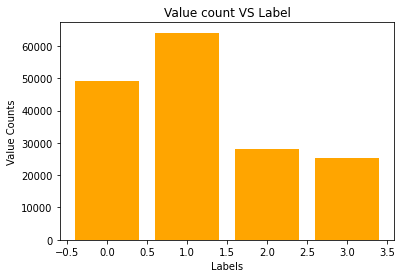

In [18]:
a = [1, 0, 2, 3]
b = [64090, 49163, 28222, 25287]
plt.bar(a,b, color = 'orange')
plt.title('Value count VS Label')
plt.xlabel('Labels')
plt.ylabel('Value Counts')
plt.show()

||  UNDER SAMPLING  ||

In [19]:
#Under-Sampling

undersampler = RandomUnderSampler(random_state=1)
US_x_train, US_y_train = undersampler.fit_resample(x_train, y_train)

#Machine Learning Models

US_KNN = KNeighborsClassifier(n_neighbors=3)
US_GNB = GaussianNB()
US_MNB = MultinomialNB()
US_DT = DecisionTreeClassifier()
US_XGB = XGBClassifier()
US_RF = RandomForestClassifier()
US_GB = GradientBoostingClassifier()
US_SGD = SGDClassifier()
US_LGBM = LGBMClassifier()

In [20]:
#Training Machine Learning Models on Under Sampled Data

model_list = [US_KNN, US_GNB, US_MNB, US_DT, US_XGB, US_RF, US_GB, US_SGD, US_LGBM]
model_names = ['K-Neighbours Classifier', 'Naive-Bayes (Gaussian) Classifier', 'Naive-Bayes (Multinomial) Classifier', 'Decision Tree Classifier', 'XGBoost Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'Stochastic Gradient Descent Classifier', 'LightGBM Classifier']
US_model_accuracy = []

k=0

for i in model_list:
    print(' '*53)
    print('>>  ', model_names[k], '  <<')
    k = k+1
    i.fit(US_x_train, US_y_train)
    model_predictions = i.predict(x_df1)
    print('>>  Model Accuracy Score = ', accuracy_score(y_df1, model_predictions))
    US_model_accuracy.append(accuracy_score(y_df1, model_predictions))
    print('>>  Model Classification Report:')
    print(classification_report(y_df1, model_predictions))
    print('_'*53)

                                                     
>>   K-Neighbours Classifier   <<
>>  Model Accuracy Score =  0.8540070087573488
>>  Model Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     82058
           1       0.89      0.79      0.84    106429
           2       0.75      0.89      0.81     47065
           3       0.91      0.97      0.94     42386

    accuracy                           0.85    277938
   macro avg       0.85      0.88      0.86    277938
weighted avg       0.86      0.85      0.85    277938

_____________________________________________________
                                                     
>>   Naive-Bayes (Gaussian) Classifier   <<
>>  Model Accuracy Score =  0.7743705430707568
>>  Model Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79     82058
           1       0.82      0.69      0.75    106429
  

||  OVER SAMPLING  ||

In [21]:
#Over Sampling

oversampler = SMOTE(random_state=1)
OS_x_train, OS_y_train = oversampler.fit_resample(x_train, y_train)

#Machine Learning Models

OS_KNN = KNeighborsClassifier(n_neighbors=3)
OS_GNB = GaussianNB()
OS_MNB = MultinomialNB()
OS_DT = DecisionTreeClassifier()
OS_XGB = XGBClassifier()
OS_RF = RandomForestClassifier()
OS_GB = GradientBoostingClassifier()
OS_SGD = SGDClassifier()
OS_LGBM = LGBMClassifier()

In [22]:
#Training Machine Learning Models on Under Sampled Data

model_list = [OS_KNN, OS_GNB, OS_MNB, OS_DT, OS_XGB, OS_RF, OS_GB, OS_SGD, OS_LGBM]
model_names = ['K-Neighbours Classifier', 'Naive-Bayes (Gaussian) Classifier', 'Naive-Bayes (Multinomial) Classifier', 'Decision Tree Classifier', 'XGBoost Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'Stochastic Gradient Descent Classifier', 'LightGBM Classifier']
OS_model_accuracy = []
k=0

for i in model_list:
    print(' '*53)
    print('>>  ', model_names[k], '  <<')
    k = k+1
    i.fit(OS_x_train, OS_y_train)
    model_predictions = i.predict(x_df1)
    print('>>  Model Accuracy Score = ', accuracy_score(y_df1, model_predictions))
    OS_model_accuracy.append(accuracy_score(y_df1, model_predictions))
    print('>>  Model Classification Report:')
    print(classification_report(y_df1, model_predictions))
    print('_'*53)

                                                     
>>   K-Neighbours Classifier   <<
>>  Model Accuracy Score =  0.8877267592052904
>>  Model Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     82058
           1       0.91      0.84      0.88    106429
           2       0.80      0.92      0.85     47065
           3       0.94      0.97      0.96     42386

    accuracy                           0.89    277938
   macro avg       0.88      0.90      0.89    277938
weighted avg       0.89      0.89      0.89    277938

_____________________________________________________
                                                     
>>   Naive-Bayes (Gaussian) Classifier   <<
>>  Model Accuracy Score =  0.7721146442731832
>>  Model Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79     82058
           1       0.82      0.68      0.74    106429
  

|| MODEL COMPARISONS ||

>>  KEY:
0  :  K-Neighbours Classifier
1  :  Naive-Bayes (Gaussian) Classifier
2  :  Naive-Bayes (Multinomial) Classifier
3  :  Decision Tree Classifier
4  :  XGBoost Classifier
5  :  Random Forest Classifier
6  :  Gradient Boosting Classifier
7  :  Stochastic Gradient Descent Classifier
8  :  LightGBM Classifier


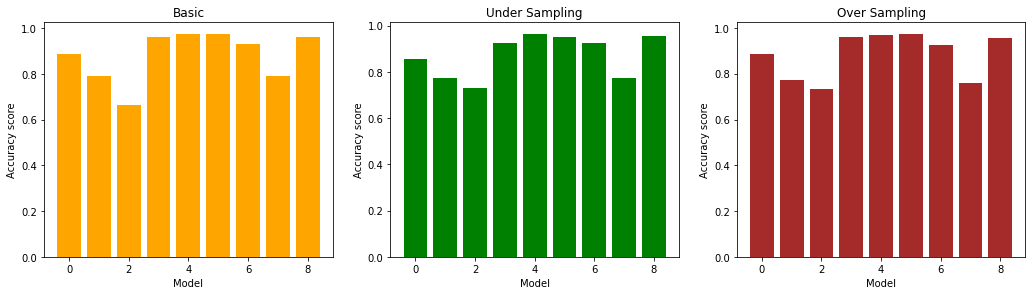

In [23]:
#Key for reference

print('>>  KEY:')
for i in range(9):
    print(i, ' : ', model_names[i])


#Plot

plt.figure(figsize=(30,25))

a = list(range(9))

#Basic
plt.subplot(5,5,1)
plt.bar(a, model_accuracy, color='orange')
plt.title('Basic')
plt.xlabel('Model')
plt.ylabel('Accuracy score')

#Under Sampling
plt.subplot(5,5,2)
plt.bar(a, US_model_accuracy, color='green')
plt.title('Under Sampling')
plt.xlabel('Model')
plt.ylabel('Accuracy score')

#Over Sampling
plt.subplot(5,5,3)
plt.bar(a, OS_model_accuracy, color='brown')
plt.title('Over Sampling')
plt.xlabel('Model')
plt.ylabel('Accuracy score')

plt.show()